# TASK 1.3 Optimization in Relation to Problem Solving

#### Import libraries and scaled CSV file
#### Follow instructions as per example script
#### Show loss function and loss profile images
#### Investigate 3 weather stations (Budapest, Madrid, Stockholm) over the span of 60 years

In [3]:
# Import libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [4]:
# Define path to scaled data
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [5]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [6]:
#Import data
weather_scaled = pd.read_csv(os.path.join(path, 'weather_scaled.csv'))

In [7]:
weather_scaled.head()

Unnamed: 0      DATE        id     MONTH  BASEL_cloud_cover  \
0           0  19600101 -1.731975 -1.599964           0.660514   
1           1  19600102 -1.731824 -1.599964           0.244897   
2           2  19600103 -1.731673 -1.599964           1.076130   
3           3  19600104 -1.731523 -1.599964          -1.001953   
4           4  19600105 -1.731372 -1.599964           0.244897   

   BASEL_wind_speed  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0          -0.02793        0.826097       -0.001949               -1.101066   
1          -0.02793        0.735760       -0.001949               -1.058108   
2          -0.02793        1.277781       -0.001949               -1.251420   
3          -0.02793        1.458455       -0.001949               -0.821838   
4          -0.02793        1.729466       -0.001949               -0.746661   

   BASEL_precipitation  ...  VALENTIA_cloud_cover  VALENTIA_humidity  \
0            -0.265148  ...             -0.443701           0.761754   
1             1.658760  ...              0.783085           1.183580   
2             0.155707  ...              0.783085           1.183580   
3            -0.445514  ...              0.783085           0.480538   
4            -0.164944  ...             -1.670486          -0.363113   

   VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0          -1.299744                  -0.806427               -0.088407   
1          -1.262455                  -1.042055                0.503361   
2          -0.432779                  -1.136306               -0.396127   
3           0.387574                  -1.183432                0.669056   
4           1.729970                  -0.794645               -0.490810   

   VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0            -0.024706           0.372147           -0.668215   
1            -0.024706          -0.829285           -0.548046   
2            -0.024706          -1.009500           -0.067372   
3            -0.024706          -1.039536           -0.998679   
4            -0.024706           0.672505           -1.509396   

   VALENTIA_temp_min  VALENTIA_temp_max  
0          -0.519743          -0.752237  
1          -0.629054          -0.407141  
2           0.054135          -0.177078  
3          -0.164486          -0.838511  
4          -1.339569          -1.471186  

[5 rows x 172 columns]

In [8]:
#Reduce to just the mean temperatures
df = weather_scaled[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101 -1.599964        -0.528623           -1.016876   
1      19600102 -1.599964        -0.582946           -1.107669   
2      19600103 -1.599964        -0.257010           -1.084971   
3      19600104 -1.599964        -0.555784           -1.209812   
4      19600105 -1.599964        -1.003946           -1.209812   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

In [10]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

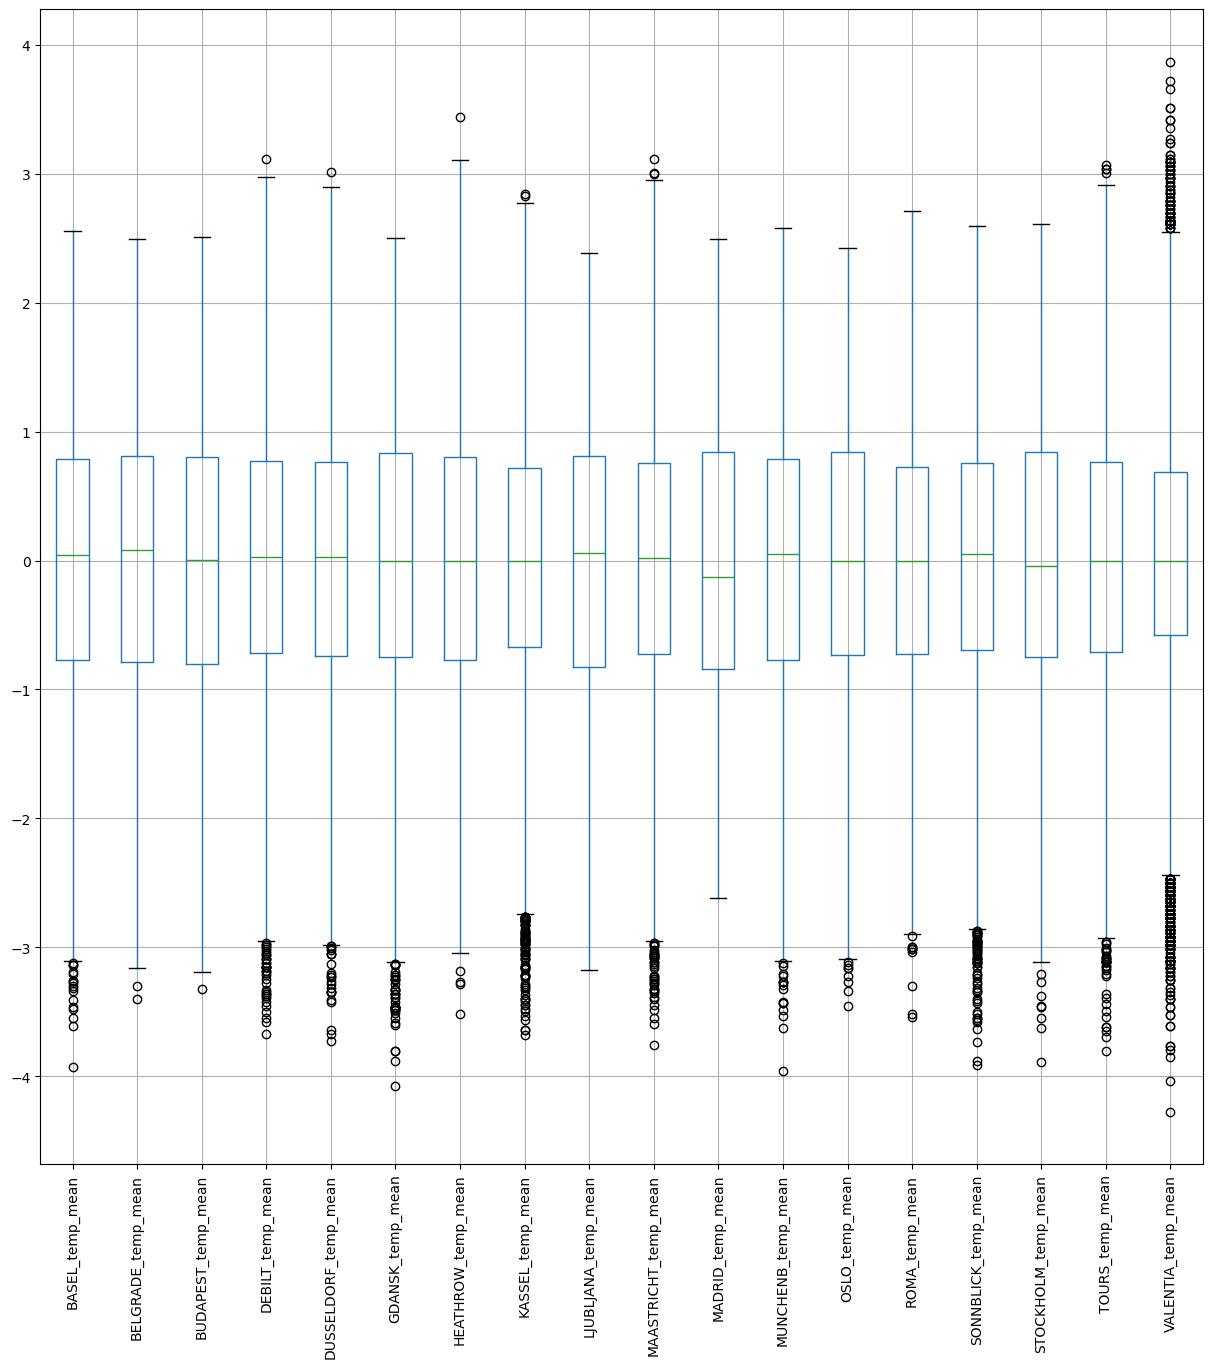

In [11]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [12]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1960')] #<-----INSERT YEAR HERE
dfyear

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0    19600101 -1.599964        -0.528623           -1.016876   
1    19600102 -1.599964        -0.582946           -1.107669   
2    19600103 -1.599964        -0.257010           -1.084971   
3    19600104 -1.599964        -0.555784           -1.209812   
4    19600105 -1.599964        -1.003946           -1.209812   
..        ...       ...              ...                 ...   
361  19601227  1.594371        -1.289140           -1.277907   
362  19601228  1.594371        -1.289140           -1.255208   
363  19601229  1.594371        -1.207656           -1.221161   
364  19601230  1.594371        -1.547172           -1.243859   
365  19601231  1.594371        -1.139752           -1.107669   

     BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0             -1.099163         -0.114356             -0.105836   
1             -1.110927         -0.367511             -0.370915   
2             -1.063873         -0.509912             -0.532908   
3             -1.146217         -0.525734             -0.577088   
4             -1.087400         -0.320045             -0.444548   
..                  ...               ...                   ...   
361           -1.440302         -1.126979             -0.974707   
362           -1.416775         -1.522534             -1.283966   
363           -1.122690         -1.570001             -1.313420   
364           -1.169744         -1.316845             -1.372326   
365           -1.216797         -1.032045             -1.048340   

     GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0           -0.927601           -0.106469         -0.182904   
1           -0.825294           -0.892676         -0.212437   
2           -0.940389           -0.490837         -0.389635   
3           -1.042696           -0.316124         -0.493001   
4           -0.978754           -0.403481         -0.552067   
..                ...                 ...               ...   
361         -0.940389           -1.469228         -0.891697   
362         -0.978754           -1.469228         -1.054129   
363         -1.234521           -1.434286         -1.305160   
364         -0.889236           -1.084860         -1.393759   
365         -1.145003           -1.137274         -1.172261   

     LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0              -1.370824             -0.097084         -0.988280   
1              -1.043881             -0.232112         -0.691740   
2              -0.741156             -0.487164         -0.853490   
3              -0.910682             -0.472161         -0.624345   
4              -0.862246             -0.307127         -0.381721   
..                   ...                   ...               ...   
361            -1.721985             -0.997267         -1.069155   
362            -1.479805             -1.342338         -1.338737   
363            -1.443478             -1.342338         -0.920885   
364            -1.273952             -1.177304         -0.772615   
365            -1.286061             -0.937255         -1.136550   

     MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
0             -0.265742       -0.186575       -1.280450            -0.124331   
1             -0.353714       -0.368598       -0.539569            -0.650834   
2             -0.403983       -0.550620       -0.876333            -0.650834   
3             -0.642763       -0.417137       -0.775304            -0.943336   
4             -0.906678       -0.332193       -0.926848            -0.621584   
..                  ...             ...             ...                  ...   
361           -1.120324       -0.417137       -1.785596            -0.914086   
362           -1.321402       -0.550620       -1.381479            -1.279713   
363           -1.459643       -0.708373       -1.819273            -1.659965   
364           -1.547614       -0.829722       -1.549861      

In [13]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   1.960067e+07    0.001171        -0.102317           -0.032384   
std    3.457653e+02    1.003590         0.935826            0.920271   
min    1.960010e+07   -1.599964        -3.190431           -2.401472   
25%    1.960040e+07   -0.728781        -0.756099           -0.594120   
50%    1.960070e+07    0.142401        -0.053300            0.055618   
75%    1.960098e+07    0.940984         0.649499            0.662798   
max    1.960123e+07    1.594371         1.820830            1.843109   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean            -0.063919         -0.052666             -0.034416   
std              0.946637          0.910451              0.919531   
min             -2.416664         -2.645913             -2.874442   
25%             -0.675681         -0.668134             -0.661766   
50%             -0.005167         -0.011511             -0.002750   
75%              0.744750          0.692578              0.715174   
max              1.806397          1.847601              1.970619   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        366.000000          366.000000        366.000000   
mean          -0.067706           -0.103366          0.026208   
std            0.978767            0.919195          0.964448   
min           -2.922584           -2.307849         -3.446307   
25%           -0.825294           -0.840262         -0.666507   
50%           -0.096358           -0.071526          0.082894   
75%            0.757265            0.714681          0.802762   
max            1.834684            1.745486          2.002543   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           366.000000            366.000000        366.000000   
mean             -0.074499             -0.063840         -0.130480   
std               0.906193              0.902235          0.979590   
min              -2.714923             -3.247725         -2.322710   
25%              -0.738129             -0.712209         -0.890557   
50%              -0.002507              0.052946         -0.294107   
75%               0.699815              0.649317          0.787590   
max               1.668536              1.688278          1.936682   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          366.000000      366.000000      366.000000   
mean            -0.101680       -0.078422        0.092554   
std              0.938523        0.998018        1.002362   
min             -3.017997       -2.249500       -2.408610   
25%             -0.777863       -0.738711       -0.653227   
50%             -0.001827       -0.168373       -0.009165   
75%              0.626541        0.869157        1.110576   
max              1.858144        1.985564        1.952486   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           366.000000           366.000000       366.000000   
mean             -0.175958            -0.092804        -0.059940   
std               0.884235             0.988702         0.944029   
min              -3.502727            -2.356684        -3.112470   
25%              -0.764178            -0.798501        -0.692653   
50%              -0.124331            -0.179582         0.032900   
75%               0.475298             0.877867         0.683937   
max               1.967058             1.686504         1.938947   

       VALENTIA_temp_mean  
count          366.000000  
mean            -0.057276  
std              1.127911  
min             -2.951420  
25%             -0.848468  
50%             -0.037330  
75%              0.893978  
max              2.606381

In [14]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

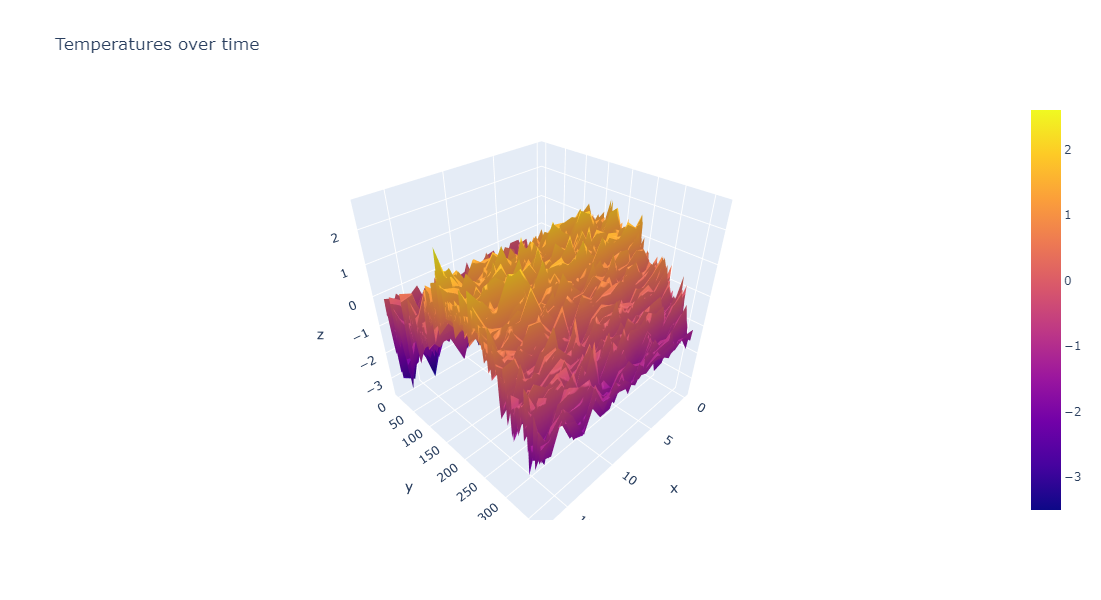

In [15]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [16]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
361   3.62
362   3.63
363   3.64
364   3.65
365   3.66

[366 rows x 1 columns]

In [17]:
n_rows = dfyear.shape[0]
n_rows

366

In [18]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['BUDAPEST_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [19]:
X.shape, y.shape

((366, 2), (366, 1))

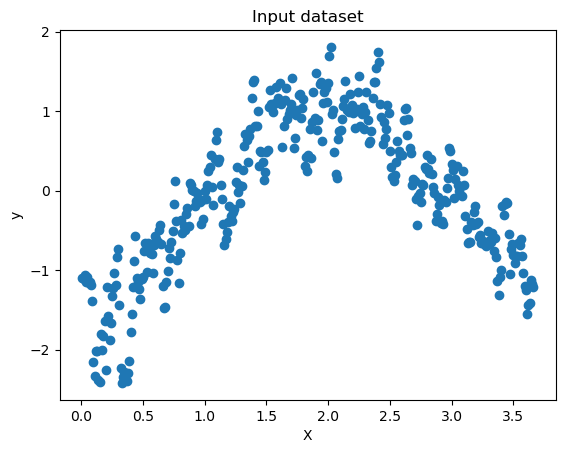

In [20]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['BUDAPEST_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [21]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].min()

-2.4166643260714715

In [22]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['BUDAPEST_temp_mean'].max()

1.8063974207400055

In [23]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [24]:
compute_cost(X,y)

array([0.44887979])

In [25]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [26]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=10 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-10],[-5]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 7.53 ms


In [27]:
theta

array([[-5.45352334],
       [ 2.36772901]])

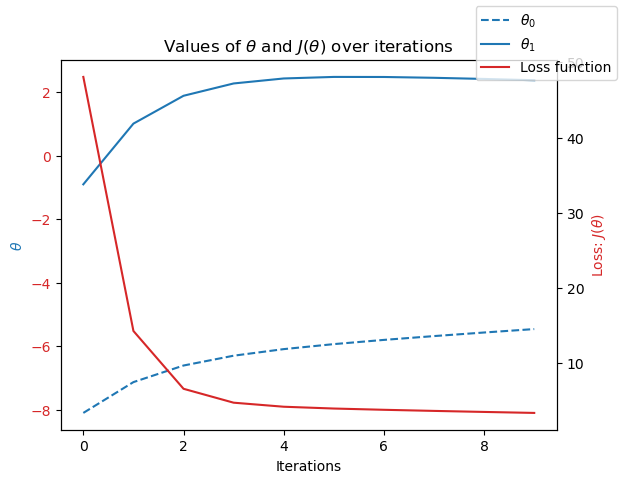

In [28]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [78]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[-5],[2]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 78.5 ms


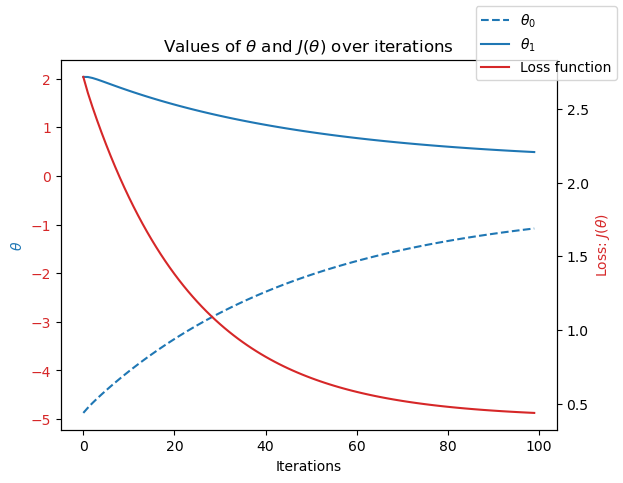

In [80]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();
plt.show()

In [29]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.23 s
Wall time: 2.77 s


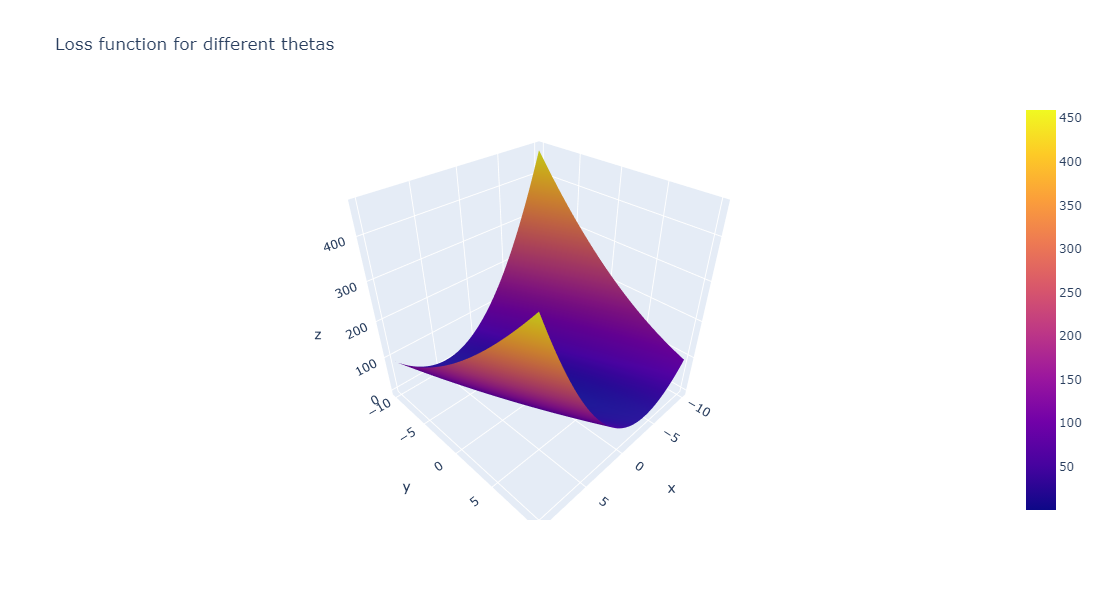

In [30]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

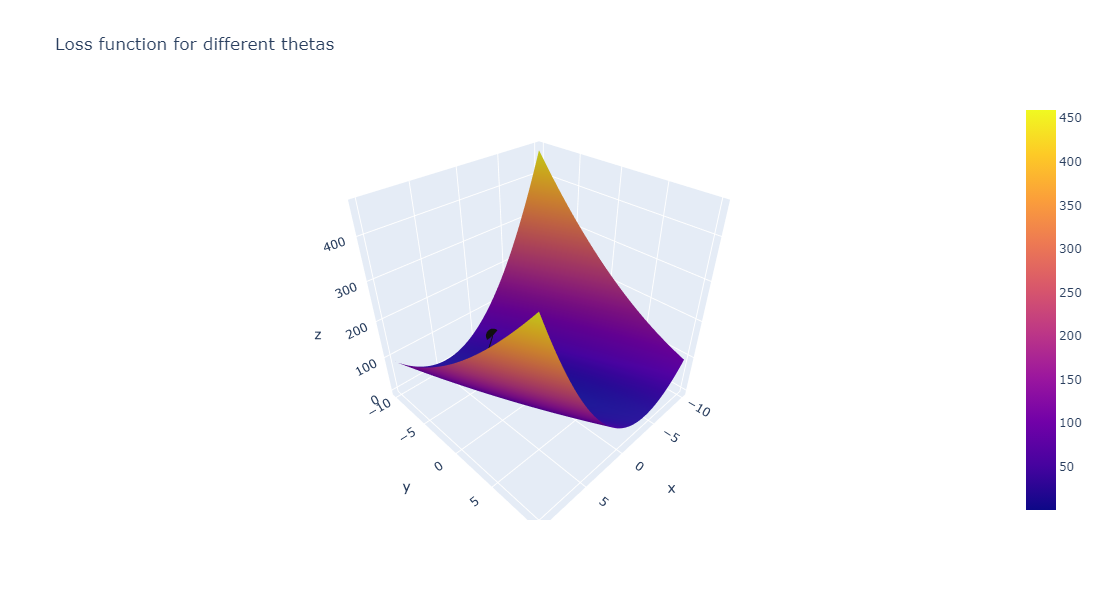

In [31]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [32]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=10 #<---start with the same iterations as above
theta_init=np.array([[1],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

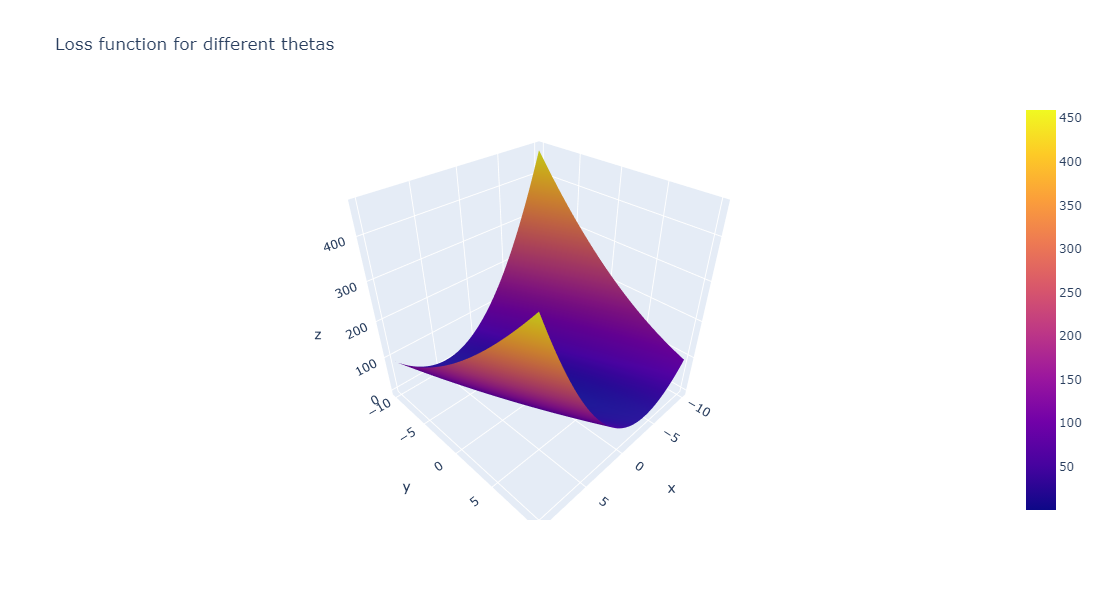

In [33]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [34]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');